In [4]:
!pip install seaborn
!pip install matplotlib

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
from selenium import webdriver  
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.keys import Keys  
from selenium.webdriver.support.ui import Select  
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException 
import re
import sys
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#vamos a abrir todos los Archivos para compararlos y los vamos a convertir en dataframes

df_actividades_asturias = pd.read_csv('../Datos/Actividades_Asturias.csv')
df_actividades_malaga = pd.read_csv('../Datos/Actividades_malaga.csv')
df_vuelos_asturias = pd.read_csv('../Datos/vuelos_Asturias.csv')
df_vuelos_malaga = pd.read_csv('../Datos/vuelos_malaga.csv')
df_motos_malaga = pd.read_csv('../Datos/vehiculos_malaga.csv')
df_hoteles_asturias = pd.read_csv('../Datos/tripadvaisor_Asturias.csv')
df_hoteles_malaga = pd.read_csv('../Datos/tripadvaisor_malaga.csv')

Vamos a sacar informacion relativa sobre los hoteles comprandolos

In [7]:
df_concat_hoteles = pd.concat([df_hoteles_asturias, df_hoteles_malaga], axis=0)
df_concat_hoteles.head(2)

,Unnamed: 0,Nombre Hotel,Talla,Puntuacion media,Detalles extra,Precio,Proveedor,URL,Ciudad
0,0,Hotel Exe Oviedo Centro,Nan,4.0,Nan,131.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias
1,1,1. Barceló Oviedo Cervantes,SMALL,4.5,Nan,168.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias


In [ ]:
df_concat_hoteles.drop(columns=['Unnamed: 0','Unnamed: 0.1','URL'])


In [9]:
puntuaciones = df_concat_hoteles.groupby('Ciudad')['Puntuacion media'].mean().reset_index()
diferencia = puntuaciones['Puntuacion media'].max() - puntuaciones['Puntuacion media'].min()

In [10]:
df_concat_hoteles.head(2)

,Unnamed: 0,Nombre Hotel,Talla,Puntuacion media,Detalles extra,Precio,Proveedor,URL,Ciudad
0,0,Hotel Exe Oviedo Centro,Nan,4.0,Nan,131.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias
1,1,1. Barceló Oviedo Cervantes,SMALL,4.5,Nan,168.0,Booking.com,https://www.tripadvisor.in/Commerce?p=BookingC...,Asturias


In [11]:
precios = df_concat_hoteles.groupby('Ciudad')['Precio'].mean().reset_index()
diferencia1 = precios['Precio'].max() - precios['Precio'].min()

In [12]:
proveedores = df_concat_hoteles.groupby(['Ciudad', 'Proveedor']).size().reset_index(name='Cantidad')

C:\Users\HP\AppData\Local\Temp\ipykernel_11436\3987112482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=puntuaciones, x='Ciudad', y='Puntuacion media', palette='magma', ax=axs[0, 0])
C:\Users\HP\AppData\Local\Temp\ipykernel_11436\3987112482.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precios, x='Ciudad', y='Precio', palette='magma', ax=axs[0, 1])


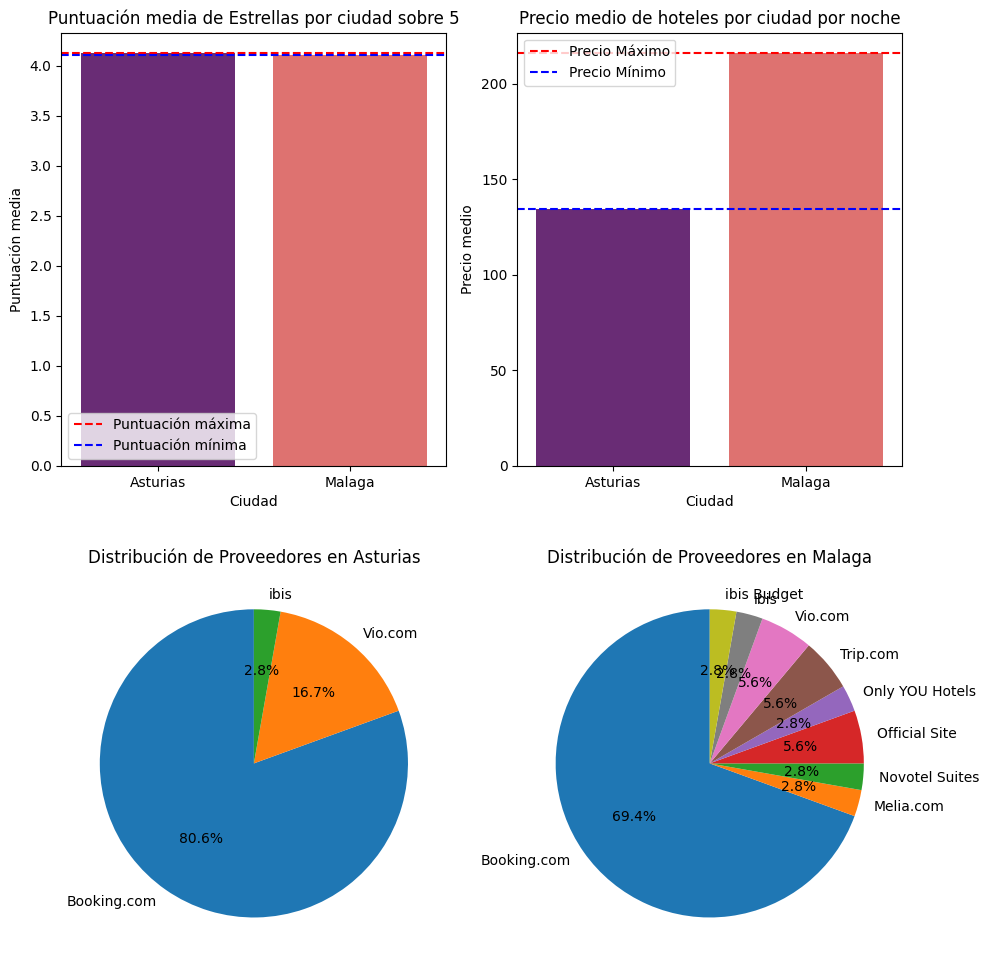

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# puntuaciones
sns.barplot(data=puntuaciones, x='Ciudad', y='Puntuacion media', palette='magma', ax=axs[0, 0])

# Líneas de puntuación máxima y mínima
axs[0, 0].axhline(y=puntuaciones['Puntuacion media'].max(), color='r', linestyle='--', label='Puntuación máxima')
axs[0, 0].axhline(y=puntuaciones['Puntuacion media'].min(), color='b', linestyle='--', label='Puntuación mínima')
axs[0, 0].set_title('Puntuación media de Estrellas por ciudad sobre 5')
axs[0, 0].set_ylabel('Puntuación media')
axs[0, 0].set_xlabel('Ciudad')
axs[0, 0].legend()

# precios
sns.barplot(data=precios, x='Ciudad', y='Precio', palette='magma', ax=axs[0, 1])
axs[0, 1].axhline(y=precios['Precio'].max(), color='r', linestyle='--', label='Precio Máximo')
axs[0, 1].axhline(y=precios['Precio'].min(), color='b', linestyle='--', label='Precio Mínimo')
axs[0, 1].set_title('Precio medio de hoteles por ciudad por noche')
axs[0, 1].set_ylabel('Precio medio')
axs[0, 1].set_xlabel('Ciudad')
axs[0, 1].legend()

#Prveedores
for i, ciudad in enumerate(proveedores['Ciudad'].unique()):
    data = proveedores[proveedores['Ciudad'] == ciudad]
    axs[1, i].pie(data['Cantidad'], labels=data['Proveedor'], autopct='%1.1f%%', startangle=90)
    axs[1, i].set_title(f'Distribución de Proveedores en {ciudad}')
plt.tight_layout()
plt.show()

Analizando por  hoteles obtemos que la calidad de los hoteles recolectados en la muestra es similar siendo asturias un poco inferior, teniendo en cuenta que asturias es una zona bastante rural la deifernecia no es significativa.

Los precios medios de los hoteles en Asturias son mas altos, esto tambien puede hacer que el descontento sea mayor y puede ser indicativo de las diferencia en las estrellas de satisfaccion.

Tambien observamos que el principal proveedor de los hoteles es booking en las dos ciudadades. Pero en Asturias es superior por lo que teniendo en cuenta que los usuarios prefieren booking por la facilidad de sus servicios, estaria por encima de malaga.


Las conclusiones respecto a los hoteles es que segun la satisfaccion y los precios es mas favorable hacer un plan con nostros en Asturias puesto que seria de media mas barato  y aunque la satisfacion seria menor al ser mayoritario el proveedor booking es mas seguro para el usuario

In [14]:
df_concat_vuelos = pd.concat([df_vuelos_asturias, df_vuelos_malaga], axis=0)
df_concat_vuelos.head(2)

,Unnamed: 0,ciudad_origen,ciudad_destino,duracion(min),aerolinea,precio,fecha_salida,hora_salida,fecha_llegada,hora_llegada
0,0,Madrid,Santiago del Monte,75,Iberia,610.93,2024-11-01,2024-10-20 16:40:00,2024-11-01,2024-10-20 17:55:00
1,1,Santiago del Monte,Madrid,75,Iberia,610.93,2024-11-03,2024-10-20 17:40:00,2024-11-03,2024-10-20 18:55:00


In [15]:
df_concat_vuelos.drop(columns=['Unnamed: 0'])
df_concat_vuelos.drop(columns=['duracion(min)'])

,Unnamed: 0,ciudad_origen,ciudad_destino,aerolinea,precio,fecha_salida,hora_salida,fecha_llegada,hora_llegada
0,0,Madrid,Santiago del Monte,Iberia,610.93,2024-11-01,2024-10-20 16:40:00,2024-11-01,2024-10-20 17:55:00
1,1,Santiago del Monte,Madrid,Iberia,610.93,2024-11-03,2024-10-20 17:40:00,2024-11-03,2024-10-20 18:55:00
2,2,Madrid,Santiago del Monte,Iberia,610.93,2024-11-01,2024-10-20 12:50:00,2024-11-01,2024-10-20 14:05:00
3,3,Santiago del Monte,Madrid,Iberia,610.93,2024-11-03,2024-10-20 17:40:00,2024-11-03,2024-10-20 18:55:00
4,4,Madrid,Santiago del Monte,Iberia,610.93,2024-11-01,2024-10-20 07:25:00,2024-11-01,2024-10-20 08:40:00
...,...,...,...,...,...,...,...,...,...
479,479,Málaga,Madrid,Iberia,354.26,2024-11-03,2024-10-20 18:00:00,2024-11-04,2024-10-20 20:40:00
480,480,Madrid,Málaga,Iberia,354.26,2024-11-01,2024-10-20 19:05:00,2024-11-02,2024-10-20 17:10:00
481,481,Málaga,Madrid,Iberia,354.26,2024-11-03,2024-10-20 12:40:00,2024-11-04,2024-10-20 15:30:00
482,482,Madrid,Málaga,Iberia,354.26,2024-11-01,2024-10-20 19:05:00,2024-11-02,2024-10-20 17:10:00


In [16]:
precio_medio = df_concat_vuelos.groupby('ciudad_origen')['precio'].mean().reset_index()
diferencia1 = (precio_medio['precio'].max() - precio_medio['precio'].min())/2
#media de precios
precio_medio = precio_medio.drop(index=0).reset_index(drop=True)
precios                                                                     #Precios para dos!!

,Ciudad,Precio
0,Asturias,134.527778
1,Malaga,215.777778


Observamos que el precio medio del vuelo es casi el doble ir a malaga que a Asturias.

In [23]:
#analizar actividades

df_concat_actividades = pd.concat([df_actividades_asturias, df_actividades_malaga], axis=0)
df_concat_actividades.head(2)
df_concat_actividades =df_concat_actividades.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.3','Unnamed: 0.2'], axis=1)
df_concat_actividades .head()





,Actividad,Descripción,Precio,Ciudad
0,"Excursión a Covadonga, Cangas de Onís y la cos...","Si os apasionala historia y la naturaleza, no ...",35.0,asturias
1,"Excursión a Avilés, Cudillero y Luarca",Acompañadnos a descubrir el hermoso ycautivado...,35.0,asturias
2,Free tour por Oviedo,Déjate seducir por los aires novelescos de la ...,0.0,asturias
3,Free tour por Gijón,Disfruta del patrimonio y de la historia deuna...,0.0,asturias
4,"Excursión a Llanes, Ribadesella y San Vicente ...","En estaexcursióna Llanes, Ribadesella ySan Vic...",35.0,asturias


In [17]:
estadisticas_actividades = df_concat_actividades.groupby('Ciudad')['Precio'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
estadisticas_actividades
#estadisticas medias de los precios de las actividades

,Ciudad,mean,median,min,max,count
0,asturias,24.700000,19.0,0.0,90.0,20
1,malaga,33.980952,25.0,0.0,120.0,21


Las activades de media en asturias son casi 10 euros mas baratas


In [18]:
#cuantas actividades gratis hay en cada ciudad
actividades_gratis = df_concat_actividades[df_concat_actividades['Precio'] == 0].groupby('Ciudad').size().reset_index(name='Actividades gratis')
actividades_gratis

,Ciudad,Actividades gratis
0,asturias,3
1,malaga,4


In [19]:
precio_medio = df_concat_actividades.groupby('Ciudad')['Precio'].mean().reset_index()
precio_medio.rename(columns={'Precio': 'precio'}, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4844\1738466431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_medio, x='Ciudad', y='precio', palette='magma', ax=ax)


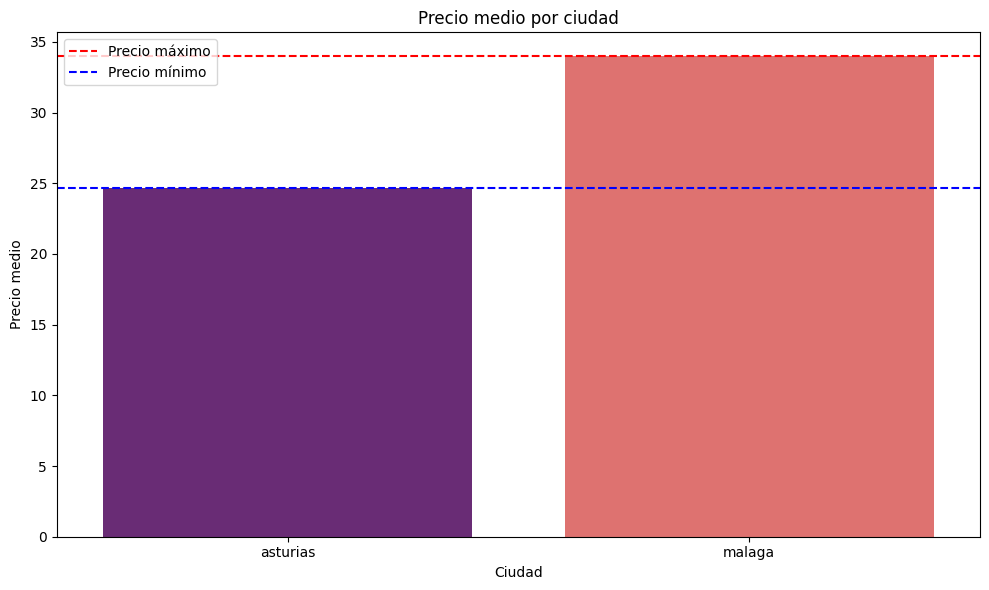

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=precio_medio, x='Ciudad', y='precio', palette='magma', ax=ax)

# Líneas para los precios máximo y mínimo
ax.axhline(y=precio_medio['precio'].max(), color='r', linestyle='--', label='Precio máximo')
ax.axhline(y=precio_medio['precio'].min(), color='b', linestyle='--', label='Precio mínimo')

# Títulos y etiquetas
ax.set_title('Precio medio por ciudad')
ax.set_ylabel('Precio medio')
ax.set_xlabel('Ciudad')
ax.legend()

# Ajustar el layout y mostrar
plt.tight_layout()
plt.show()

las actividades por lo general son bastantes mas caras en malaga